# Project description

We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.

We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

# Data description

In this dataset, the Entertainment Software Rating Board (ESRB) evaluates a game's content and assigns an age rating such as Teen or Mature.

—Name

—Platform

—Year_of_Release

—Genre

—NA_sales (North American sales in USD million)

—EU_sales (sales in Europe in USD million)

—JP_sales (sales in Japan in USD million)

—Other_sales (sales in other countries in USD million)

—Critic_Score (maximum of 100)

—User_Score (maximum of 10)

—Rating (ESRB)

Data for 2016 may be incomplete.

# Library imports

In [1]:
#Libraries and project environment setup:

##Pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np

##Matplotlib for visualization
import matplotlib.pyplot as plt

##Remove warnings
import sys
import warnings
if not sys.warnoptions:
   warnings.simplefilter("ignore");

##Scipy for SDA
from scipy import stats as st

# CSV file read

In [3]:
#We use try-except to handle unexpected errors
try:
    df=pd.read_csv('/datasets/games.csv')
except:
    df=pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

# General information

In [3]:
#First, in order to guarantee efficiency we immediately drop row-based duplicates
df.drop_duplicates(inplace=True,keep='first')
df.reset_index(drop=True, inplace=True)

In [4]:
#Print the first five entries in the dataframe
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


There are NaN values in Critic_score, User_score and Rating columns.

In [5]:
#General file examination
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Results show column names are accurate to the project data description.
- Dataset includes 16715 entries and 11 columns.
- There are missing values in the Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating columns.
- Critic_score contains float type values we'll need to convert to integer.
- User_score contains object type values we'll need to convert to float.

In [6]:
#Integrated display of the columns
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


- Year_of_Release min is 1980 and max 2016 (current year).

- Average (mean) is 2006 and most (50%-medium) 2007, there isn't much of a difference between these values and the std is relatively low, therefore, we assume the distribution of this variable is close to normal.

- NA_sales, EU_sales, JP_sales and Other_sales columns share a min of 0, which may be due to lack of sales. It seems they all have positively skewed distributions. All third quartiles are less than 1 million USD, max values are approx. 10-42.

- Critic_Score min is 13 and max 98. The average is about 69, the medium value is 71 and std is reasonable (~14), therefore we assume the distribution is close to normal.

# Preprocessing

## Column names

In [7]:
#Replacing column names with their lowercase versions
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Missing values

As we found above when calling the info() function, there are missing values in the name, year_of_release, genre, critic_Score, user_Score and rating columns. Now we get to deal with them.

In [8]:
#Before we start, we look at the percentage of missing values in all the columns
df.isna().sum()*100/len(df)
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')
round(df.isna().mean()*100,2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

### Name and genre

In [9]:
#A rule of thumb is that we don't drop more than 5%-10% of the data
#Name and genre columns are missing 0.01%
#Data may be missing due to human/technical error
#Dropping both entries
df = df.dropna(subset=['name','genre'], axis=0)
df.reset_index(drop=True, inplace=True)

###  Year_of_release

In [10]:
#Year_of_release column is missing 1.61%
#Data may be missing due to human/technical error
#Now we fill the missing values with the median per platform and genre
df['year_of_release'] = df.groupby(['platform','genre'])['year_of_release'].apply(lambda x: x.fillna(x.median()))

In [11]:
#Changing float data type to integer 
df['year_of_release'] = np.floor(df['year_of_release']).astype(int)

### Critic_Score

In [12]:
#Critic_score column is missing 51.32%
#Data may be missing due to human/technical error
#Now we fill the missing values with the median per rating then name
df['critic_score'] = (df['critic_score'].astype(float))

### User_Score

In [13]:
#Replacing TBD with NaN since the score is still technically missing
df['user_score'] = df['user_score'].replace('tbd',np.nan)
#Changing object data type to float 
df['user_score'] = df['user_score'].astype(float)
#Print correlation between critic_score and user_score
df['user_score'].corr(df['critic_score'])

0.5808778320767237

### Rating

In [15]:
#Rating column is missing 40.48%
#Data may be missing due to human/technical error
#Now we fill the missing values based on name
df['rating']= df['rating'].fillna('unknown')

In [16]:
#Printing percentage of missing values in all the columns to ensure none are left
df.isna().sum()*100/len(df)
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')
round(df.isna().mean()*100,2)

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.31
user_score         54.59
rating              0.00
dtype: float64

At the moment, we leave these missing values

## Data types

In [17]:
#Print data types
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Data types have been changed earlier when dealing with the missing values and are now all in order.

## Total sales calculation column

In [18]:
#Calculating the total sales (the sum of sales in all regions) for each game
#Then, putting these values in a separate column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# EDA

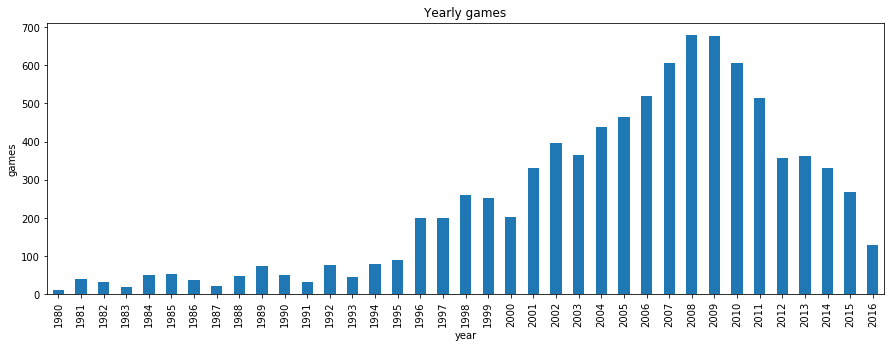

In [19]:
#Plotting histogram of number of games released per year to find out if the data for every period is significant
##df.hist('year_of_release')
plt.figure(figsize=(15,5))
df.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Yearly games')
plt.xlabel('year')
plt.ylabel('games');

Number of games is low and insignificant before ~1992, then grows and peaks in ~2009-2012 and afterwards drops by about a half. This could be due to a slow start as technology evolves, then a peak as the game market and demand rapidly grows and finally less new games are released and instead existing ones get updated.

#### <font color='Purple'>Student's commentary:</font> Good point! done.  <a class="tocSkip"> </div>

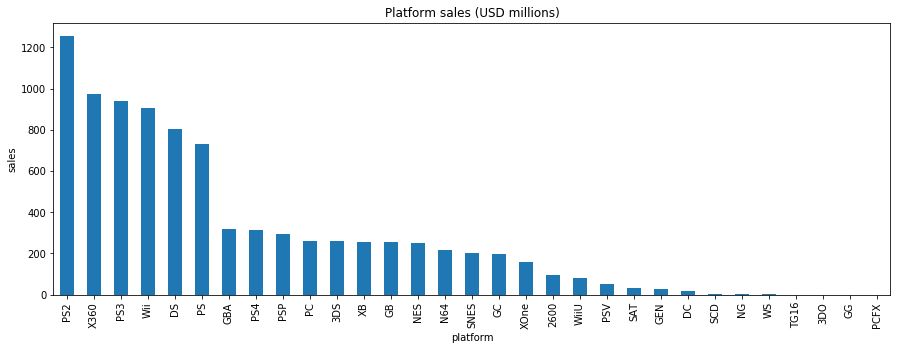

In [20]:
#Plotting barplot of total sales per platform in USD millions to find the platforms with the greatest total sales
plt.figure(figsize=(15,5))
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Platform sales (USD millions)')
plt.ylabel('sales');

'PS2','X360','PS3','Wii','DS','PS' are the 6 platforms with the greatest total sales.

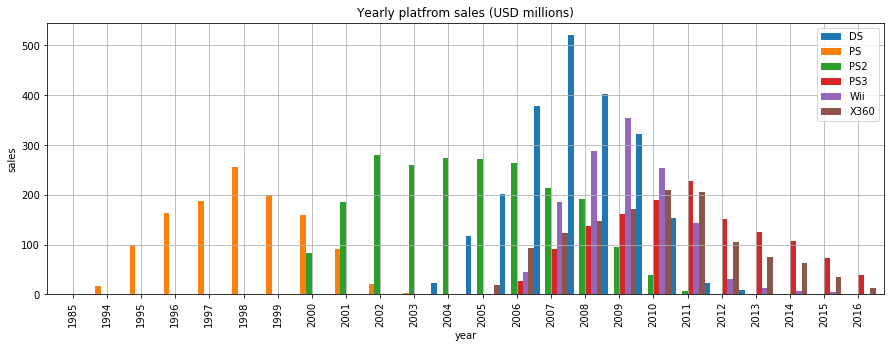

In [21]:
#Choosing the platforms with the greatest total sales and build a distribution based on data for each year
#First we create a dataframe with the 6 top platforms seen in the plot above
platform_year = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])].groupby(["year_of_release","platform"]).size().unstack()

#Now we plot
platform_year.plot(by='platform',kind='bar', grid=True, figsize=(15,5), width=1)
plt.title('Yearly platfrom sales (USD millions)')
plt.xlabel('year')
plt.ylabel('sales')
plt.legend(loc='upper right');

'PS2','DS','PS' are 3 platforms that used to be popular but now (2016) have zero sales. 
It generally takes a decade (10 years) for new platforms to appear and old ones to fade.

We now can determine what data period is necessary in order to build a prognosis for 2017. We'll take data from 5 years back, since the platform's popularity peak is in the middle of it's 10 year lifespan, this way we'll be able to find what platforms will lead in 2017.

In [22]:
#Creating dataframe of data from 2012 to 2016 in order to predict 2017
df_5 = df[df['year_of_release'] >= 2012]

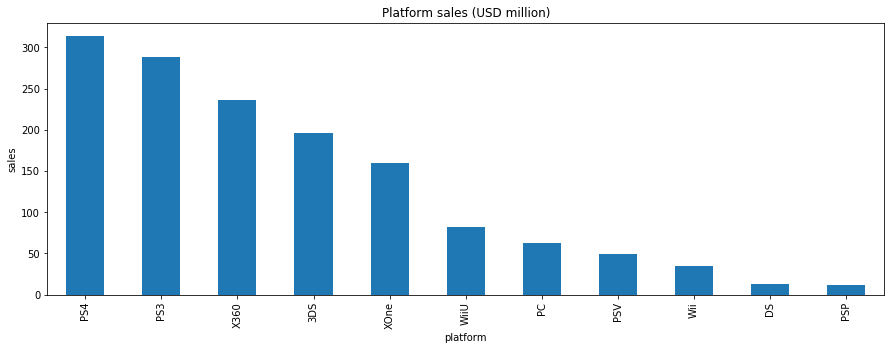

In [23]:
#Plotting barplot of total sales per platform in USD millions from the past 5 years
plt.figure(figsize=(15,5))
df_5.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Platform sales (USD million)')
plt.ylabel('sales');

'PS4', 'PS3', 'X360', '3DS' and 'XOne' are the 5 platforms leading in sales.

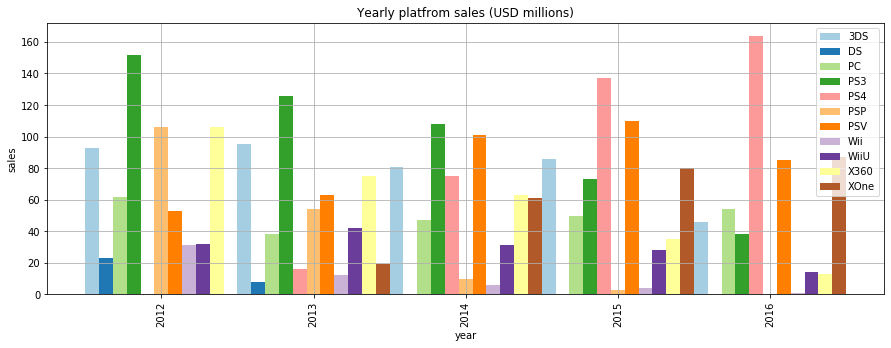

In [24]:
#First we create a dataframe with all the platforms seen in the plot above
platform_year_5 = df_5[df_5['platform'].isin(['PS4','PS3','X360','3DS','XOne','WiiU','PC','PSV','Wii','DS','PSP'])].groupby(["year_of_release","platform"]).size().unstack()

#Now we plot to find which platforms are growing or shrinking in order to select several potentially profitable platforms
platform_year_5.plot(by='platform',kind='bar', grid=True, figsize=(15,5), width=1, colormap='Paired')
plt.title('Yearly platfrom sales (USD millions)')
plt.xlabel('year')
plt.ylabel('sales')
plt.legend(loc='upper right');

'PS3', 'X360', 'Wii', 'DS', 'PSP' and 'WiiU' are the 6 platforms shrinking ('3DS' and 'PSV' are also shrinking but not as significantly).

'PS4' and 'XOne' are the 2 platforms growing and are part of the top 3 platforms leading in sales as shown in the previous plot ('PC' is also growing but not as significantly). Therefore, we can expect both these platforms to be profitable in 2017.

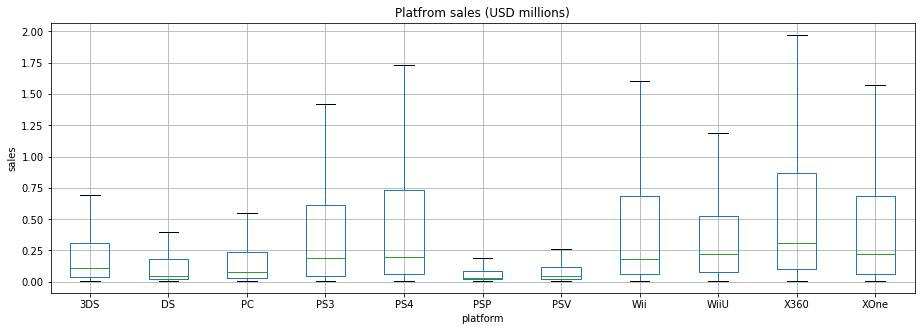

In [25]:
#Building a boxplot for the global sales of all games, broken down by platform
df_5.boxplot(by='platform', column='total_sales', figsize=(15,5),showfliers = False)
plt.suptitle('')
plt.title('Platfrom sales (USD millions)')
plt.ylabel('sales');

As found before, 'PS4', 'PS3', 'X360', '3DS' and 'XOne' are the 5 platforms leading in sales. There aren't any significant sales differences as seen in their box plots. Although we do clearly see a difference between the sales of these leading platforms and the rest.

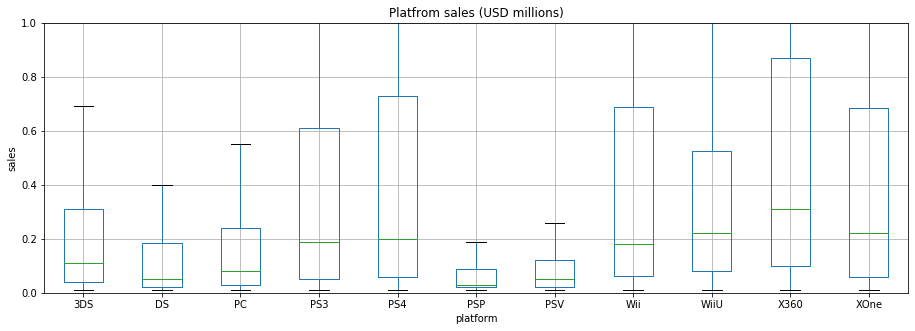

In [26]:
#Taking a closer look at our boxplot in order to see averages
df_5.boxplot(by='platform', column='total_sales', figsize=(15,5),showfliers = False)
plt.suptitle('')
plt.ylim(0,1)
plt.title('Platfrom sales (USD millions)')
plt.ylabel('sales');

The distributions are positively skewed. We see that there are differences in average sales on various platforms.

- 'X360' has the highest average of ~0.3. 

- 'PS4','PS3','3DS','XOne','WiiU' and 'Wii', all have the average of around ~0.2.

- 'PC','PSV','DS' and 'PSP' all have the average of around ~0.1 or less.

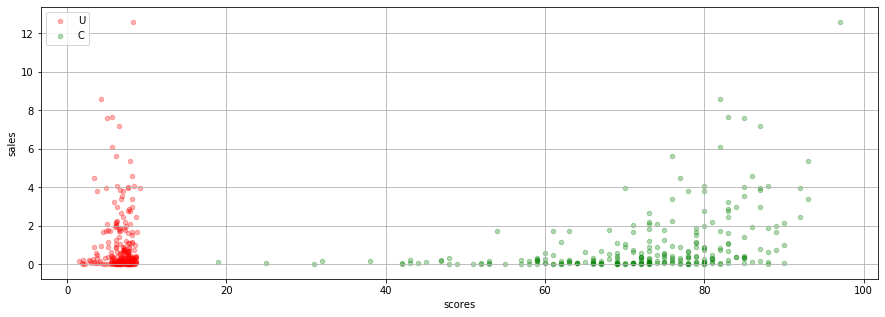

In [27]:
#Taking a look at user and professional reviews affect on sales for the popular platform with the most sales (PS4)
#Creating a dataframe for 'PS4'
ps4 = df_5[df_5['platform']=='PS4']

#Building a scatter plot
ax1 = ps4.plot(kind='scatter', x='user_score', y='total_sales', color='r', figsize=(15,5), alpha=(0.3))    
ax2 = ps4.plot(kind='scatter', x='critic_score', y='total_sales', color='g', alpha=(0.3), grid=True, ax=ax1)    
plt.xlabel('scores')
plt.ylabel('sales')
ax1.legend('UC');

In [28]:
#Calculating the correlation between reviews and sales
print('Correlation between user reviews and sales: {:.2f}'.format(ps4['total_sales'].corr(ps4['user_score'])))
print('Correlation between professional reviews and sales: {:.2f}'.format(ps4['total_sales'].corr(ps4['critic_score'])))

Correlation between user reviews and sales: -0.03
Correlation between professional reviews and sales: 0.41


We clearly see in the scatterplot above that the better the review (higher the score), the better and higher the sales, which makes perfect sense.

- Critic_Score (maximum of 100)
Correlation between professional reviews and sales: 0.39, meaning there is almost a moderate positive correlation.

- User_Score (maximum of 10)
Correlation between user reviews and sales: -0.03, meaning there is almost no correlation whatsoever.


The correlation between professional reviews and sales is higher than that of user reviews, that could be due to customers only taking the trusted critics' reviews into consideration when purchasing a game or just being more exposed those over the user ones.

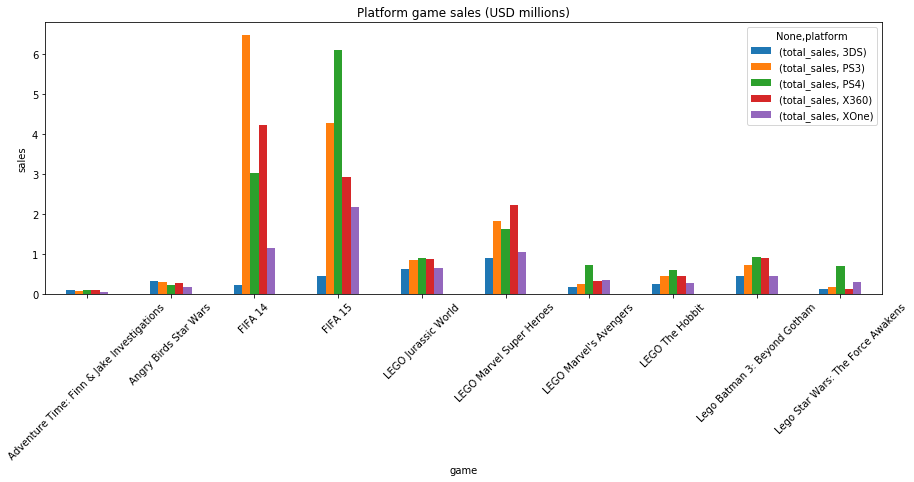

In [29]:
#We pick the top 5 platforms leading in sales in order to properly compare game sales and create a dataframe
platform_games=df_5[df_5['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]

#Creating a pivot table and plotting game sales per platform
(platform_games.pivot_table(index=['name','platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).unstack(1).dropna()[0:10].plot(kind='bar', figsize=(15,5)))
plt.title('Platform game sales (USD millions)')
plt.xlabel('game')
plt.xticks(rotation=45)
plt.ylabel('sales');

Most games seem to have relatively similar sales per platform. Both FIFA 14 and FIFA 15 each have a platform that sells more than the rest (FIFA 14-PS3 and FIFA 15-PS4).

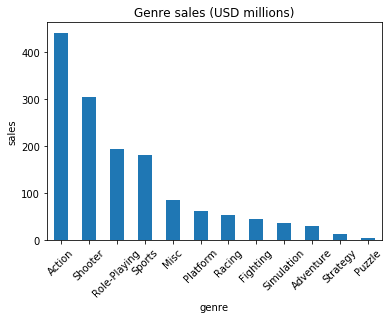

In [30]:
#Take a look at the general distribution of games by genre by plotting
df_5.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Genre sales (USD millions)')
plt.xlabel('genre')
plt.xticks(rotation=45)
plt.ylabel('sales');

Action is clearly the most popular game genre with the highest revenue, followed by Shooter, Role-Playing and Sports.

Generally, active, dramatic and thrilling genres are those with high sales, maybe since they excite and give a break from reality. Relaxing, quiet and cognitive genres tend to be those with low sales, since they are less exhilarating and therefore, less addicting and even boring to some.

In [31]:
df_5.pivot_table(index='genre', values='total_sales', aggfunc=['median','mean'])

,median,mean
,total_sales,total_sales
genre,,
Action,0.120,0.427829
Adventure,0.030,0.096885
Fighting,0.135,0.405727
Misc,0.120,0.442917
Platform,0.210,0.717647
Puzzle,0.045,0.174643
Racing,0.140,0.465217
Role-Playing,0.140,0.516444


Here we calculated the mean and median sales per genre, the leader has changed and is now the Shooter genre.

# Regions' user profiles

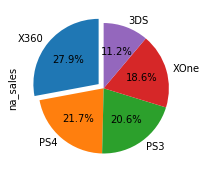

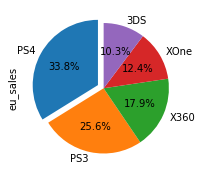

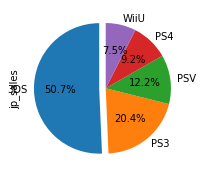

In [32]:
#Separating largest market shares from the rest when plotting the following pies 
explode=(0.1,0,0,0,0)

#NA top 5 platforms pie
na_platforms = df_5.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
na_top_platforms = na_platforms.head()
na_top_platforms.set_index('platform').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=na_top_platforms['platform'], explode=explode, legend=None, startangle=90);

#EU top 5 platforms pie
eu_platforms = df_5.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
eu_top_platforms = eu_platforms.head()
eu_top_platforms.set_index('platform').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=eu_top_platforms['platform'], explode=explode, legend=None, startangle=90);

#JP top 5 platforms pie
jp_platforms = df_5.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
jp_top_platforms = jp_platforms.head()
jp_top_platforms.set_index('platform').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=jp_top_platforms['platform'], explode=explode, legend=None, startangle=90);

NA highest market share-X360 (27.9%), EU highest market share-PS4 (33.8%), JP highest market share-3DS (50.7%). Each region's highest market share is different. PS3, PS4 and X360 are in the top 3 in EU and NA yet not in JP. 

NA lowest market share-3DS (11.2%), EU lowest market share-3DS (10.3%), JP lowest market share-WiiU (7.5%). Each region's lowest market share is different. XOne and 3DS are the top 4th and 5th in EU and NA yet not in JP where 3DS is highest and XOne isn't even part of the top 5. 

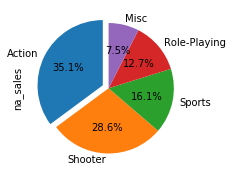

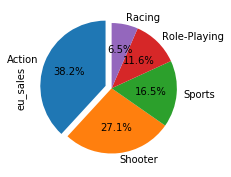

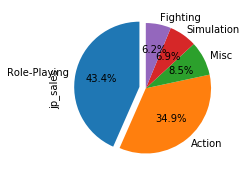

In [33]:
#NA top 5 genres pie
na_genres = df_5.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
na_top_genres = na_genres.head()
na_top_genres.set_index('genre').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=na_top_genres['genre'], explode=explode, legend=None, startangle=90);

#EU top 5 genres pie
eu_genres = df_5.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
eu_top_genres = eu_genres.head()
eu_top_genres.set_index('genre').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=eu_top_genres['genre'], explode=explode, legend=None, startangle=90);

#JP top 5 genres pie
jp_genres = df_5.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
jp_top_genres = jp_genres.head()
jp_top_genres.set_index('genre').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=jp_top_genres['genre'], explode=explode, legend=None, startangle=90);

NA top genre-Action (35.1%), EU top genre-Action (38.2%), JP top genre-Role-Playing (43.4%).

Action is the top genre in EU and NA yet 2nd in JP.
Shooter and Sports are the top 2nd and 3rd in EU and NA yet not in JP where they aren't even part of the top 5.
NA and EU 4th genre is Role-Playing while being the top in JP.
Each region's 5th genre is different.

In [34]:
#Finding the value counts of the rating column in order to adjust explode if needed
df_5['rating'].value_counts().count()

5

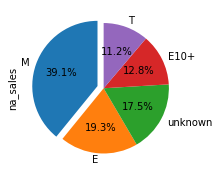

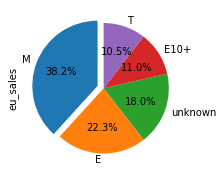

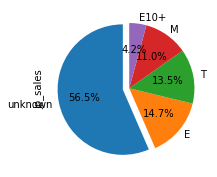

In [35]:
#NA ratings pie
na_ratings = df_5.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
na_ratings.set_index('rating').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=na_ratings['rating'], explode=explode, legend=None, startangle=90);

#EU ratings pie
eu_ratings = df_5.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
eu_ratings.set_index('rating').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=eu_ratings['rating'], explode=explode, legend=None, startangle=90);

#JP ratings pie
jp_ratings = df_5.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
jp_ratings.set_index('rating').plot(figsize=(3,3), subplots=True, kind='pie', autopct='%1.1f%%', labels=jp_ratings['rating'], explode=explode, legend=None, startangle=90);

ESRB ratings affect sales in individual regions, this is probably due to age distribution of gamers per region.

NA most popular rating-M (39.1%), EU most popular rating-M (38.2%), JP most popular rating-unknown (56.5%).

NA least popular rating-T (11.2%), EU least popular rating-T (10.5%), JP least popular rating-E10+ (4.2%). 

NA and EU share the same ratings popularity order of M E unknown E10+ T (ratings of each almost equal), while JP's order is unknown E T M E10+ (E and T almost equal).

We find that there is a significant amount of unknown ratings in all regions. This could be due to errors in the dataset or missing ratings.

# SDA

## Average user ratings of the Xbox One and PC platforms are the same

Null Hypothesis H0: Average user ratings of the Xbox One and PC platforms are the same.

Alternative Hypothesis H1: Average user ratings of the Xbox One and PC platforms aren't the same.

The criterion we'll use to test the hypotheses is 5% significance level (alpha) as it is typical in behavioral science.

In [36]:
#Testing hypotheses by running t-test
results = st.ttest_ind(df_5[df_5['platform'] == 'XOne'].dropna()['user_score'], df_5[df_5['platform'] == 'PC'].dropna()['user_score'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.6269861118965969
We can't reject the null hypothesis


T-test results above show that based on the p_value, we can't reject the null hypothesis. Therefore, the average user ratings of the Xbox One and PC platforms are the same.

## Average user ratings for the Action and Sports genres are different

Null Hypothesis H0: Average user ratings for the Action and Sports genres aren't different.

Alternative Hypothesis H1: Average user ratings for the Action and Sports genres are different.

The criterion we'll use to test the hypotheses is 5% significance level (alpha) as it is typical in behavioral science.

In [37]:
#Again, we test hypotheses by running t-test
results = st.ttest_ind(df_5[df_5['genre'] == 'Action'].dropna()['user_score'], df_5[df_5['genre'] == 'Sports'].dropna()['user_score'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  6.000451347280956e-14
We reject the null hypothesis


T-test results above show that based on the p_value, we reject the null hypothesis. Therefore, the average user ratings for the Action and Sports genres are different.

# General conclusion

We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.


We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

Available data goes back to 2016. For this project, we assume that it’s December 2016 and we’re planning a campaign for 2017. 

First, we followed data analysis methodology, preprocessing data, handling missing values, deleting duplicates, dropping insignificant missing data that is less than 5%. Next we performed EDA and SDA. Following that we analyzed the remaining valid data in accordance to the project requirements. 

Our final conclusion can be split per region, as detailed in table below. We assume this is due to cultural differences, where JP differs significantly from NA and EU. 

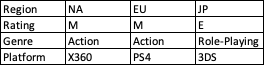

In addition, we identified PS4 and XOne as growing platforms we predict will lead in 2017 sales.